In [2]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 53.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.3 MB/s eta 0:00:00


In [3]:
import PIL
import transformers as tf
import torch
import requests
from io import BytesIO
from PIL import Image
from transformers import ViltProcessor,ViltForQuestionAnswering
import streamlit as st

In [4]:
# vilt code
processor=ViltProcessor.from_pretrained("dandelin/vilt-b32-finetuned-vqa")
model=ViltForQuestionAnswering.from_pretrained("dandelin/vilt-b32-finetuned-vqa")

def get_answer(image,text):
  # load image
  img=Image.open(BytesIO(image)).convert('RGB')

  # prepare inputs
  encoding = processor(img, text, return_tensors="pt")

  # forward pass
  outputs = model(**encoding)
  logits = outputs.logits
  idx = logits.argmax(-1).item()

  # get predicted answer
  answer = model.config.id2label[idx]
  return answer

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/251 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/320 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/136k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/470M [00:00<?, ?B/s]

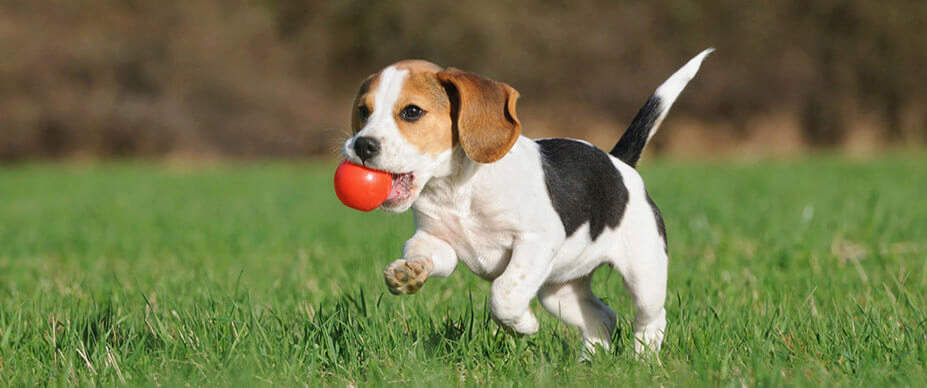

In [23]:
import cv2
from google.colab.patches import cv2_imshow

# Read image using OpenCV
img = cv2.imread("/content/dog-playtime-927x388.jpg")

# Display image
cv2_imshow(img)

In [26]:
# check the model by uploading image
img=Image.open("/content/dog-playtime-927x388.jpg")
buffer = BytesIO()
img.save(buffer, format="JPEG")
image_bytes = buffer.getvalue()

question = "What is the colour of the dog?"

In [27]:
# find answers for different set of questions
answer = get_answer(image_bytes, question)
print("Predicted Answer:", answer)

Predicted Answer: brown and white


In [ ]:
st.set_page_config(layout="wide",page_title="VQA App")
st.title("Visual Question Answering App")
st.write("Upload an Image and enter question")

col1, col2 =st.columns(2)

# image uplaod
with col1:
  upload_file=st.file_uploader("Upload an Image",type=['jpeg','jpg','png'])
  if upload_file is not None:
    image = Image.open(upload_file)
    st.image(image,use_column_width=True)

with col2:
  question=st.text_input("Enter a Question")

  # answer retrieval
  if upload_file and question is not None:
    if st.button("Ask Question"):
      image=Image.open(upload_file)
      image_byte_array=BytesIO()
      image.save(image_byte_array,format="jpeg")
      image_bytes=image_byte_array.getvalue()

      # find answer
      answer=get_answer(image_bytes,question)
      st.info("Your Question:" + question)
      st.success("Answer:" + answer)

In [28]:
# Streamlit app
def main():
    st.title("Vilt Question Answering App")

    # Upload image
    uploaded_image = st.file_uploader("Upload Image", type=["jpg", "jpeg", "png"])

    # Text input for question
    question = st.text_input("Enter a Question")

    if uploaded_image is not None and question:
        # Display uploaded image
        st.image(uploaded_image, caption="Uploaded Image", use_column_width=True)

        # Convert uploaded image to bytes
        image_bytes = uploaded_image.getvalue()

        # Get answer from image and question
        answer = get_answer(image_bytes, question)

        # Display answer
        st.subheader("Answer:")
        st.write(answer)

# Run the app
if __name__ == "__main__":
    main()

2024-05-14 22:38:23.208 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-05-14 22:38:23.211 Session state does not function when running a script without `streamlit run`
